### **Install**

In [ ]:
pip install emoji==1.7


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=7762aed1063a7f5369a693e48beee4d8970489aba9e87834806306adc898ffc8
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji


In [ ]:
pip install keras

ERROR: Operation cancelled by user


### **Melihat file csv**

In [ ]:
import pandas as pd

df = pd.read_csv('dataset-labelin-final.csv')
df

,stemming,scores,compound,sentimen
0,program makan siang gratis kasih makan ego,"{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp...",0.5106,positive
1,surya ssr ferizandra bospurwa bijak tapera bij...,"{'neg': 0.129, 'neu': 0.547, 'pos': 0.324, 'co...",0.7733,positive
2,prabowo subianto presiden pilih antusias proye...,"{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp...",0.8020,positive
3,wagimandeep statement hina program makan siang...,"{'neg': 0.143, 'neu': 0.59, 'pos': 0.267, 'com...",0.6597,positive
4,clparr papa dukung program program makan siang...,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.7003,positive
...,...,...,...,...
6875,makan gizi gratis projo prabowogibran indonesi...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.5106,positive
6876,program makan gizi gratis target sasar juta orang,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.5106,positive
6877,program makan gizi gratis resmi jalan januari ...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.5106,positive
6878,program makan gizi gratis ngapain woii cakimin...,"{'neg': 0.07, 'neu': 0.725, 'pos': 0.206, 'com...",0.6908,positive


### **Resampling Data**

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Memuat data dari file CSV
data = pd.read_csv('dataset-labelin-final.csv')

# Memisahkan fitur dan target
# Gantilah 'sentimen' dengan nama kolom target yang sesuai dalam dataset Anda
target_column = 'sentimen'
text_column = 'stemming'
X = data[text_column]
y = data[target_column]

# Menampilkan distribusi variabel target sebelum penyeimbangan
print("Distribusi sebelum penyeimbangan:")
print(y.value_counts())

# Mengubah teks menjadi representasi numerik menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Menerapkan RandomOverSampler untuk menyeimbangkan data
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_tfidf, y_train)

# Menampilkan distribusi variabel target setelah penyeimbangan
print("\nDistribusi setelah penyeimbangan:")
print(y_train_res.value_counts())

# Membuat model Random Forest dan melatihnya dengan data yang telah diresample
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Memprediksi pada data pengujian dan menghasilkan laporan klasifikasi
y_pred = clf.predict(X_test_tfidf)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Distribusi sebelum penyeimbangan:
sentimen
positive    3932
negative    1500
neutral      108
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



Distribusi setelah penyeimbangan:
sentimen
positive    3146
negative    3146
neutral     3146
Name: count, dtype: int64

Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.80      0.65      0.72       300
     neutral       0.27      0.18      0.22        22
    positive       0.88      0.95      0.91       786

    accuracy                           0.85      1108
   macro avg       0.65      0.59      0.61      1108
weighted avg       0.84      0.85      0.84      1108



### **Word2Vec menggunakan CBOW**

In [ ]:
pip install --upgrade nltk


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Hapus tanda baca dan angka
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Konversi ke huruf kecil
    text = text.lower()

    # Tokenisasi
    words = word_tokenize(text)

    # Hapus stop words
    words = [word for word in words if word not in stopwords.words('english')]

    return words

# Contoh penggunaan dengan dataset Anda
# Ganti `dataset` dengan data Anda
# Misal, jika dataset berupa list of sentences
dataset = ["This is a sample sentence.", "dhemit is back gabisa pake program makan siang gratis coba pake program nuklir jok jokowi"]
processed_data = [preprocess_text(sentence) for sentence in dataset]
from gensim.models import Word2Vec

# Latih model Word2Vec menggunakan CBOW
model = Word2Vec(sentences=processed_data, vector_size=100, window=5, min_count=1, sg=0)

# Simpan model yang telah dilatih
model.save("word2vec_cbow.model")
# Muat model yang telah disimpan
model = Word2Vec.load("word2vec_cbow.model")

# Contoh penggunaan model
# Dapatkan representasi vektor untuk kata tertentu
vector = model.wv['sample']

# Dapatkan kata-kata yang paling mirip dengan kata tertentu
similar_words = model.wv.most_similar('sample')
print(similar_words)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('nuklir', 0.25290459394454956), ('pake', 0.13724049925804138), ('coba', 0.04406548663973808), ('gratis', 0.01281161978840828), ('jok', 0.006598459556698799), ('back', -0.0011978191323578358), ('siang', -0.025584062561392784), ('program', -0.04125342145562172), ('sentence', -0.07639002799987793), ('gabisa', -0.10619832575321198)]


### **One Hot Encoding**

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample dataset
data = {'Category': ['positif', 'netral', 'negatif']}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(df[['Category']])

# Convert to DataFrame for better visualization
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Category']))
print("\nOne-Hot Encoded DataFrame:")
print(encoded_df)

# Concatenate original and encoded DataFrame
final_df = pd.concat([df, encoded_df], axis=1)
print("\nFinal DataFrame:")
print(final_df)


Original DataFrame:
  Category
0  positif
1   netral
2  negatif

One-Hot Encoded DataFrame:
   Category_negatif  Category_netral  Category_positif
0               0.0              0.0               1.0
1               0.0              1.0               0.0
2               1.0              0.0               0.0

Final DataFrame:
  Category  Category_negatif  Category_netral  Category_positif
0  positif               0.0              0.0               1.0
1   netral               0.0              1.0               0.0
2  negatif               1.0              0.0               0.0


### `**Bidirectional Long Short Term Memory Code**`

### **Import Library**

In [ ]:
pip install scipy==1.9.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import emoji

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, History
from gensim.models import Word2Vec

### **Load Data**

In [3]:
df = pd.read_csv('dataset-labelin-final.csv')
df

,stemming,scores,compound,sentimen
0,program makan siang gratis kasih makan ego,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.8176,positive
1,surya ssr ferizandra bospurwa bijak tapera bij...,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",0.7865,positive
2,prabowo subianto presiden pilih antusias proye...,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",0.8240,positive
3,wagimandeep statement hina program makan siang...,"{'neg': 0.143, 'neu': 0.59, 'pos': 0.267, 'com...",0.6597,positive
4,clparr papa dukung program program makan siang...,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.7003,positive
...,...,...,...,...
7436,txtdrimedia cocok menu alhamdulillah makan sih,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.5574,positive
7437,txtdrimedia shilitt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
7438,txtdrimedia mending kasih orang aja dah,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.6369,positive
7439,txtdrimedia gibran cari,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


### **Check**

In [4]:
# Check the column names
print("sentimen", df.columns)

# Check the dataframe info
df.info()

sentimen Index(['stemming', 'scores', 'compound', 'sentimen'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7441 entries, 0 to 7440
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stemming  7287 non-null   object 
 1   scores    7441 non-null   object 
 2   compound  7441 non-null   float64
 3   sentimen  7441 non-null   object 
dtypes: float64(1), object(3)
memory usage: 232.7+ KB


### **Cleaning Data**

In [5]:
import re
import string
import emoji

# Clean emoji from text
def strip_emoji(text):
    return emoji.replace_emoji(text, replace="")

# Remove punctuations, links, mentions, and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').lower()  # Remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove links and mentions
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # Remove non-utf8/ascii characters
    banned_list = string.punctuation + 'Ã' + '±' + 'ã' + '¼' + 'â' + '»' + '§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

# Clean hashtags '#' symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))  # Remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))  # Remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+", " ", text)

# Ensure all 'stemming' values are strings
df['stemming'] = df['stemming'].fillna("").astype(str)

# Apply the cleaning functions
texts_new = []
for t in df['stemming']:
    texts_new.append(remove_mult_spaces(clean_hashtags(strip_all_entities(strip_emoji(t)))))

df['cleaned_text'] = texts_new

# Rearrange the column order
df = df.reindex(columns=['stemming', 'cleaned_text', 'sentimen'])
df.head()


,stemming,cleaned_text,sentimen
0,program makan siang gratis kasih makan ego,program makan siang gratis kasih makan ego,positive
1,surya ssr ferizandra bospurwa bijak tapera bij...,surya ssr ferizandra bospurwa bijak tapera bij...,positive
2,prabowo subianto presiden pilih antusias proye...,prabowo subianto presiden pilih antusias proye...,positive
3,wagimandeep statement hina program makan siang...,wagimandeep statement hina program makan siang...,positive
4,clparr papa dukung program program makan siang...,clparr papa dukung program program makan siang...,positive


### **Tokenizing**

In [6]:
# Tokenize the text
tokenizer = Tokenizer(num_words=512, lower=True, split=' ')
tokenizer.fit_on_texts(df['cleaned_text'])

X = tokenizer.texts_to_sequences(df['cleaned_text'])

# Define the maximum length for padding
MAX_LEN = 32
X = pad_sequences(X, padding='post', maxlen=MAX_LEN)

# Map sentiment to numerical values
df['sentimen'] = df['sentimen'].map({'negative': 0, 'neutral': 1, 'positive': 2})
df.head()

# Convert sentiment to labels
y = df['sentimen']

### **Word2Vec**

Ukuran kosakata: 10699

Vektor Word2Vec untuk 10 kata pertama:
Kata           Vektor
----------------------------------------------------------------------
makan          [-0.8419 -0.3032  3.0614  0.3949  0.9427 -0.4382  0.8246 -0.4982 -1.9839
 -1.538   0.3084  1.3535 -0.4398  1.4579 -0.8116  1.6546  1.241  -0.5749
  0.1605  2.1874  0.3899 -2.7407 -2.4104 -1.496   2.1662 -0.8396 -0.2638
  0.5893  1.8423  0.4433 -1.011   1.5482]
gratis         [-0.6945 -0.5958  2.6584  0.0409  1.9705 -0.3391  0.8915 -0.9436 -1.4664
 -0.486   0.679   0.6987 -1.3533  1.4203 -0.6389  1.7701  1.4333  0.0284
  0.2183  1.7406  0.0908 -2.6177 -2.1257 -2.0846  2.1252 -1.0361  0.0517
  0.1341  2.2305  0.974  -1.1315  2.1357]
siang          [-1.4530e-01 -1.3596e+00  2.9638e+00  3.0190e-01  9.9650e-01 -7.4320e-01
  1.3502e+00 -1.3341e+00 -1.3285e+00 -1.4169e+00  5.1080e-01  7.0860e-01
 -1.1277e+00  7.1160e-01 -3.8560e-01  9.9800e-01  2.1825e+00 -3.6640e-01
 -6.3200e-02  2.2192e+00  4.6370e-01 -2.0973e+00 -2.7164e+

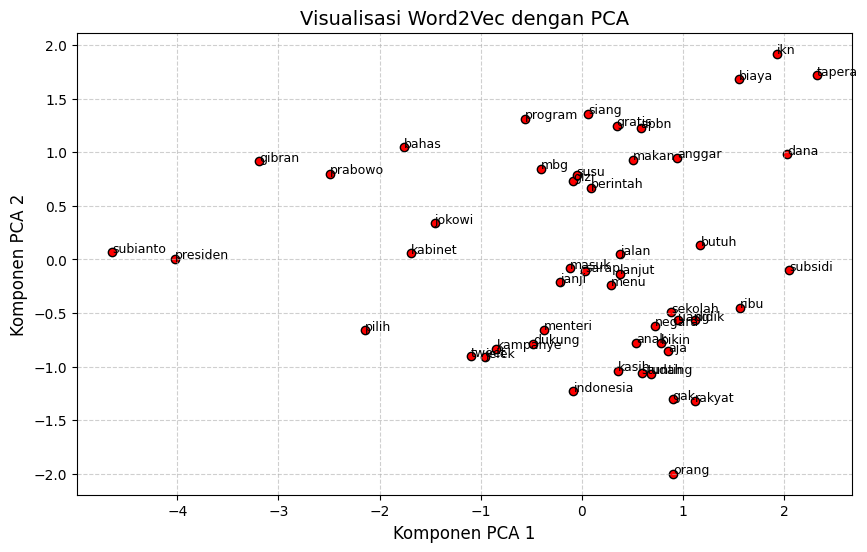


Visualisasi dengan t-SNE:


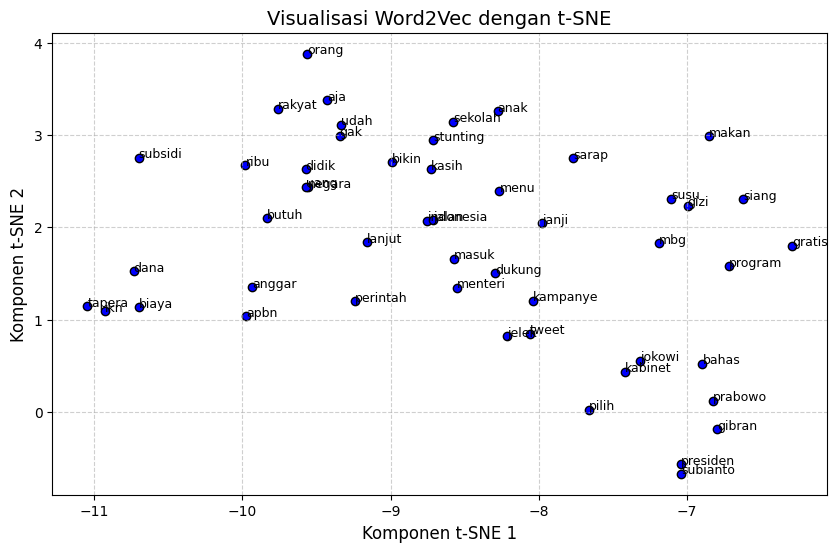

In [7]:
# Import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Definisi model Word2Vec
sentences = [text.split() for text in df['cleaned_text']]
word2vec_model = Word2Vec(sentences, vector_size=32, window=5, min_count=1, workers=4, seed=42)

# Tampilkan ukuran kosakata dan beberapa vektor kata
words = list(word2vec_model.wv.index_to_key)
print(f"Ukuran kosakata: {len(words)}")
print("\nVektor Word2Vec untuk 10 kata pertama:")
print(f"{'Kata':<15}{'Vektor'}")
print("-" * 70)
for word in words[:10]:
    print(f"{word:<15}{word2vec_model.wv[word].round(4)}")

# Fungsi untuk visualisasi dengan PCA
def plot_pca(model, num_words):
    words = list(model.wv.index_to_key)[:num_words]
    word_vectors = [model.wv[word] for word in words]

    # Reduksi dimensi ke 2D
    pca = PCA(n_components=2)
    word_vecs_2d = pca.fit_transform(word_vectors)

    # Plot hasil PCA
    plt.figure(figsize=(10, 6))
    plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, word_vecs_2d):
        plt.text(x, y, word, fontsize=9)
    plt.title('Visualisasi Word2Vec dengan PCA', fontsize=14)
    plt.xlabel('Komponen PCA 1', fontsize=12)
    plt.ylabel('Komponen PCA 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Fungsi untuk visualisasi dengan t-SNE
def plot_tsne(model, num_words):
    words = list(model.wv.index_to_key)[:num_words]
    word_vectors = [model.wv[word] for word in words]

    # Reduksi dimensi ke 2D dengan t-SNE
    tsne = TSNE(n_components=2, random_state=0, init='pca', perplexity=30)
    word_vecs_2d = tsne.fit_transform(np.array(word_vectors))

    # Plot hasil t-SNE
    plt.figure(figsize=(10, 6))
    plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], edgecolors='k', c='b')
    for word, (x, y) in zip(words, word_vecs_2d):
        plt.text(x, y, word, fontsize=9)
    plt.title('Visualisasi Word2Vec dengan t-SNE', fontsize=14)
    plt.xlabel('Komponen t-SNE 1', fontsize=12)
    plt.ylabel('Komponen t-SNE 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Visualisasi Word2Vec
print("\nVisualisasi dengan PCA:")
plot_pca(word2vec_model, 50)

print("\nVisualisasi dengan t-SNE:")
plot_tsne(word2vec_model, 50)


### **Resampling Data**

Initial class distribution:
sentimen
2    5066
0    1872
1     503
Name: count, dtype: int64

Class distribution after resampling:
sentimen
2    5066
0    5066
1    5066
Name: count, dtype: int64

Sample of resampled data:
                                        cleaned_text  sentimen
0         program makan siang gratis kasih makan ego         2
1  surya ssr ferizandra bospurwa bijak tapera bij...         2
2  prabowo subianto presiden pilih antusias proye...         2
3  wagimandeep statement hina program makan siang...         2
4  clparr papa dukung program program makan siang...         2

Sample tokenized data:
[[  4   1   3   2  43   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [109  18 109  18  11  11   4   1   3   2   4   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5  35  12  24  85 471 276   4   1   3   2  77 443  44 197   0   0   0
    0   0   0   0   0   0   0   0  

<ipython-input-8-b9e3212aec0b>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x='sentimen', palette='Blues')


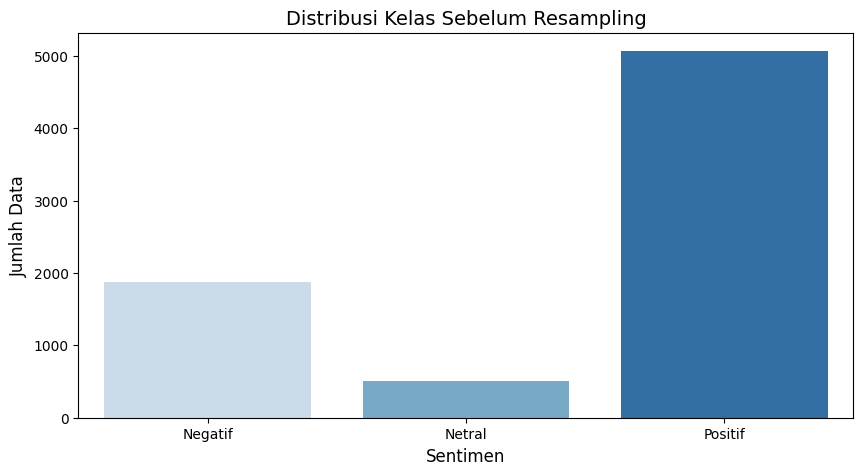

<ipython-input-8-b9e3212aec0b>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_upsampled, x='sentimen', palette='Greens')


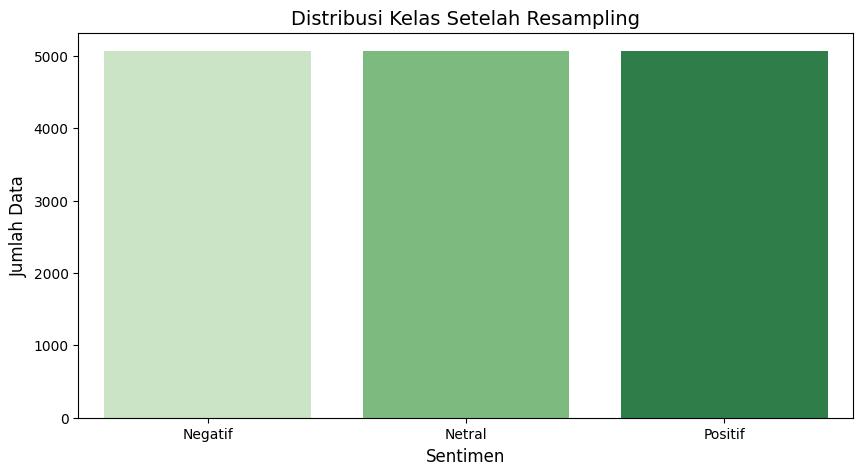

In [8]:
# Create a new DataFrame for resampling
new_data = pd.DataFrame()
new_data['cleaned_text'] = df['cleaned_text']
new_data['sentimen'] = df['sentimen']

# Separate the majority and minority classes
df_majority = new_data[new_data.sentimen == 2]  # Positive
df_minority1 = new_data[new_data.sentimen == 0]  # Negative
df_minority2 = new_data[new_data.sentimen == 1]  # Neutral

# Display initial class distribution
print("Initial class distribution:")
print(new_data['sentimen'].value_counts())

# Upsample the minority classes
from sklearn.utils import resample

df_minority_upsampled1 = resample(df_minority1,
                                  replace=True,
                                  n_samples=df_majority.shape[0],
                                  random_state=123)
df_minority_upsampled2 = resample(df_minority2,
                                  replace=True,
                                  n_samples=df_majority.shape[0],
                                  random_state=123)

# Combine the majority class with the upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_upsampled1, df_minority_upsampled2])

# Display class distribution after resampling
print("\nClass distribution after resampling:")
print(df_upsampled['sentimen'].value_counts())

# Show a sample of the resampled data
print("\nSample of resampled data:")
print(df_upsampled.head())

# Tokenize the resampled data
X_resampled = tokenizer.texts_to_sequences(df_upsampled['cleaned_text'])
X_resampled = pad_sequences(X_resampled, padding='post', maxlen=MAX_LEN)

# Convert sentiment back to one-hot encoding
y_resampled = pd.get_dummies(df_upsampled['sentimen']).astype(int)

# Display tokenized data and one-hot encoded labels
print("\nSample tokenized data:")
print(X_resampled[:5])  # Show the first 5 rows

print("\nSample one-hot encoded labels:")
print(y_resampled.head())

# Visualisasi distribusi kelas sebelum resampling
plt.figure(figsize=(10, 5))
sns.countplot(data=new_data, x='sentimen', palette='Blues')
plt.title('Distribusi Kelas Sebelum Resampling', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Negatif', 'Netral', 'Positif'], fontsize=10)
plt.show()

# Visualisasi distribusi kelas setelah resampling
plt.figure(figsize=(10, 5))
sns.countplot(data=df_upsampled, x='sentimen', palette='Greens')
plt.title('Distribusi Kelas Setelah Resampling', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Negatif', 'Netral', 'Positif'], fontsize=10)
plt.show()

### **Split Data**

In [9]:
# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Further split the training set into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)


Train Set -> (9726, 32) (9726, 3)
Validation Set -> (2432, 32) (2432, 3)
Test Set -> (3040, 32) (3040, 3)


### **Bidirectional Long Short Term Memory**

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)        │ (None, 32, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 32, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 16, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_22                │ (None, 128)            │        49,664 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,227 (1.44 MB)

 Trainable params: 376,227 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.4405 - loss: 1.1389 - val_accuracy: 0.5588 - val_loss: 0.9182
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.5819 - loss: 0.8760 - val_accuracy: 0.5991 - val_loss: 0.8241
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6096 - loss: 0.8213 - val_accuracy: 0.6464 - val_loss: 0.7855
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6429 - loss: 0.7750 - val_accuracy: 0.7085 - val_loss: 0.7162
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.7092 - loss: 0.6888 - val_accuracy: 0.7442 - val_loss: 0.6544
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.7630 - loss: 0.6157 - val_accuracy: 0.7759 - val_loss: 0.5975
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7963 - loss: 0.5459 - val_accuracy: 0.7866 - val_loss: 0.5651
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8233 - loss: 0.5049 -

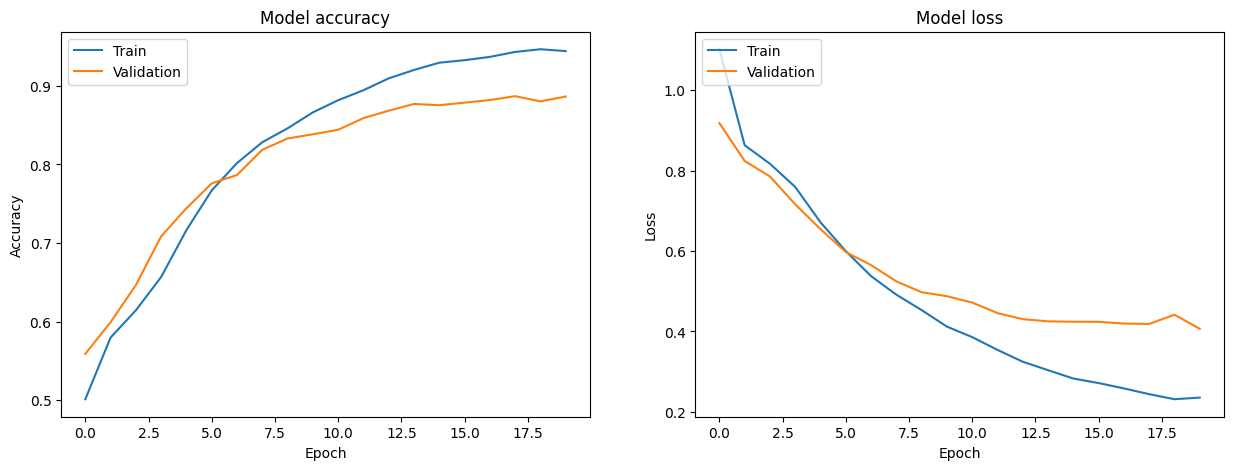

In [53]:
from keras.regularizers import l2
from keras.optimizers import Adam

# Model definition and training
vocab_size = 5000
embedding_size = 64
epochs = 20
learning_rate = 0.0001  # Lower learning rate for stability

model = Sequential([
    Input(shape=(MAX_LEN,)),  # Explicitly define the input shape
    Embedding(vocab_size, embedding_size),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),
    Dropout(0.3),  # Increased dropout rate
    Dense(3, activation='softmax', kernel_regularizer=l2(0.01))  # Added L2 regularization
])

print(model.summary())

# Use Adam optimizer with a stable learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 64
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size, epochs=epochs)

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # summarize history for accuracy
    axs[0].plot(history.epoch, history.history['accuracy'])
    axs[0].plot(history.epoch, history.history['val_accuracy'])
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc='upper left')

    # summarize history for loss
    axs[1].plot(history.epoch, history.history['loss'])
    axs[1].plot(history.epoch, history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_training_hist(history)


### **Evaluasi Model**

95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8878 - loss: 0.4156
Test Accuracy: 88.22%
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


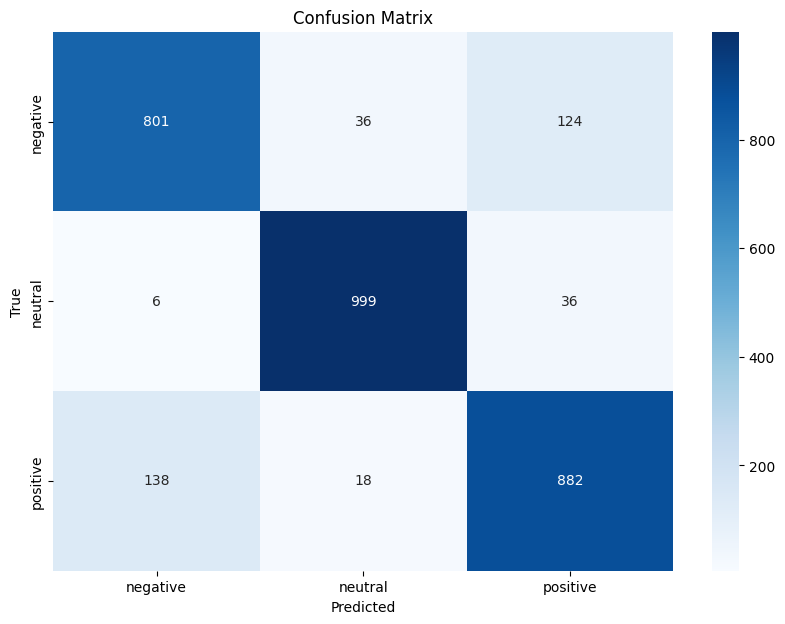

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.83      0.84       961
     neutral       0.95      0.96      0.95      1041
    positive       0.85      0.85      0.85      1038

    accuracy                           0.88      3040
   macro avg       0.88      0.88      0.88      3040
weighted avg       0.88      0.88      0.88      3040

Precision (Weighted): 88.2%
Recall (Weighted): 88.2%
F1-Score (Weighted): 88.2%


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)
classes = ['negative', 'neutral', 'positive']

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_true, y_pred_classes, classes)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=classes))

# Overall metrics
overall_precision = precision_score(y_true, y_pred_classes, average='weighted') * 100
overall_recall = recall_score(y_true, y_pred_classes, average='weighted') * 100
overall_f1 = f1_score(y_true, y_pred_classes, average='weighted') * 100

print(f"Precision (Weighted): {overall_precision:.1f}%")
print(f"Recall (Weighted): {overall_recall:.1f}%")
print(f"F1-Score (Weighted): {overall_f1:.1f}%")



Sentiment Analysis Results:
  Sentiment  True Count  Predicted Count  Predicted Percentage
0  negative         961             1061                 34.90
1   neutral        1041             1051                 34.57
2  positive        1038              928                 30.53


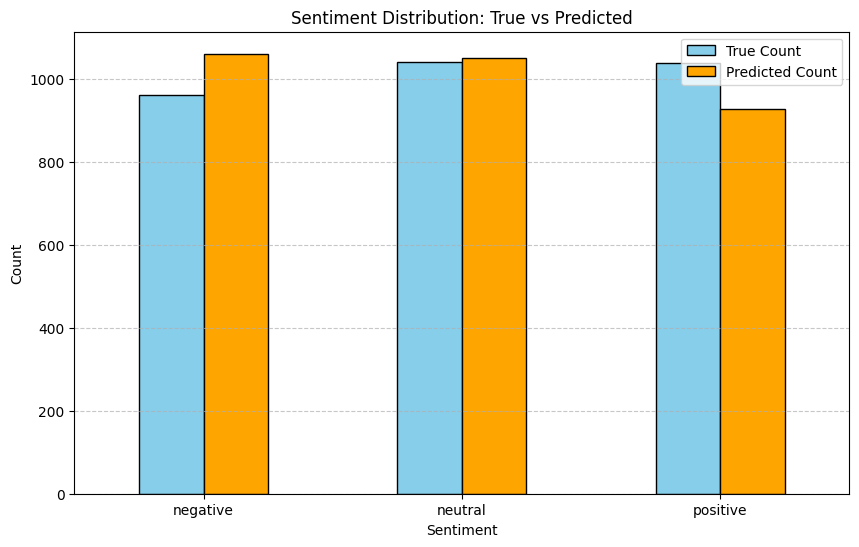

In [ ]:
import pandas as pd

# Hitung jumlah setiap kelas
predicted_counts = pd.Series(y_pred_classes).value_counts().sort_index()
true_counts = pd.Series(y_true).value_counts().sort_index()

# Buat tabel hasil perhitungan
result_table = pd.DataFrame({
    'Sentiment': classes,
    'True Count': true_counts.values,
    'Predicted Count': predicted_counts.values,
    'Predicted Percentage': (predicted_counts / len(y_pred_classes) * 100).round(2)
})

print("\nSentiment Analysis Results:")
print(result_table)

# Plot hasil dalam bentuk grafik batang
result_table.plot(
    x='Sentiment',
    y=['True Count', 'Predicted Count'],
    kind='bar',
    figsize=(10, 6),
    color=['skyblue', 'orange'],
    edgecolor='black'
)
plt.title("Sentiment Distribution: True vs Predicted")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.legend(['True Count', 'Predicted Count'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Model**

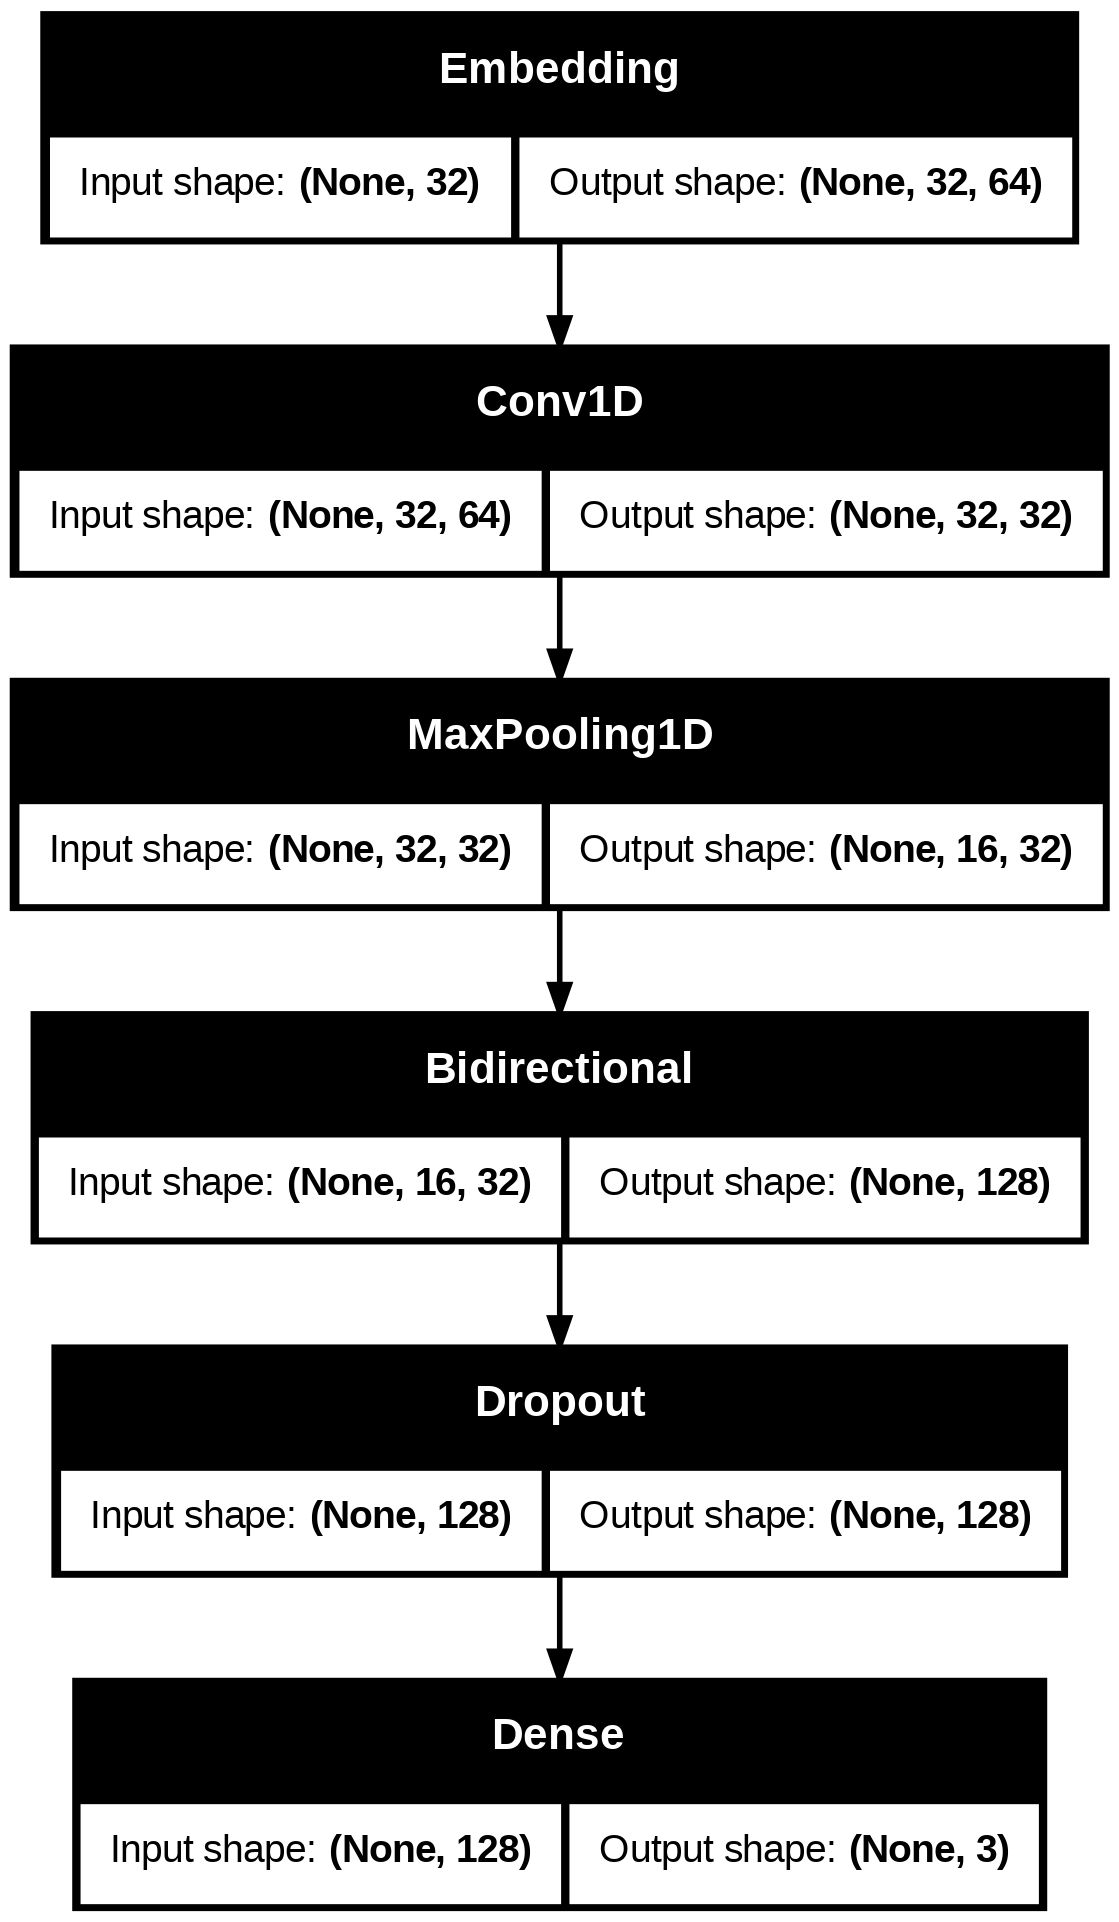

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

Best model saved


### **Prediksi**

In [ ]:
predict_class(['jelek banget'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
The predicted sentiment is Negative
